In [7]:
# 필요 라이브러리 다운 
# !pip install selenium
# !pip install webdriver_manager
# !pip install html5lib
# !pip install IPython 

In [10]:
#패키지 호출

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException

from bs4 import BeautifulSoup

from urllib.request import urlopen
from urllib.parse import quote_plus
from pandas.io.html import read_html
import time
import sys
import pandas as pd
import numpy as np

# 주피터 노트북 이미지 삽입 라이브러리
from IPython.display import Image

### path 지정

In [11]:
import os

# 파일이 있는 현재 위치를 path로 지정
current_directory = os.getcwd()
path = current_directory.replace('\\', '/')
path += '/' if not path.endswith('/') else ''

data_path = path + "data/"
print("Data_path :", data_path)

img_path = path + "img/"
print("IMG_path :", img_path)

#필요시 path 재조정
# path = 'C:/Users/sook7/미래에솦_주피터/본선코드정리/'
# data_path = path + "data/"
# img_path = path + "img/"

Data_path : C:/Users/sook7/미래에솦_주피터/[빅데이터_미래에솦]소스코드/data/
IMG_path : C:/Users/sook7/미래에솦_주피터/[빅데이터_미래에솦]소스코드/img/


### 글꼴

In [12]:
#windows 실행시
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = path + 'NanumGothic.ttf'
# 폰트 설정
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

#MAC 실행시
# plt.rcParams["font.family"] = "Arial Unicode MS"

---
# 38communication 크롤링
## 수요예측결과 메뉴 

- 기업명, 종목코드, 예측일, 공모희망가(밴드가), 공모가, 공모금액, 기관경쟁률, 의무보유확약, 주간사 
- 종목코드는 기업명을 하나씩 클릭하며 이동되는 페이지이 있는 종목코드를 가져옵니다.


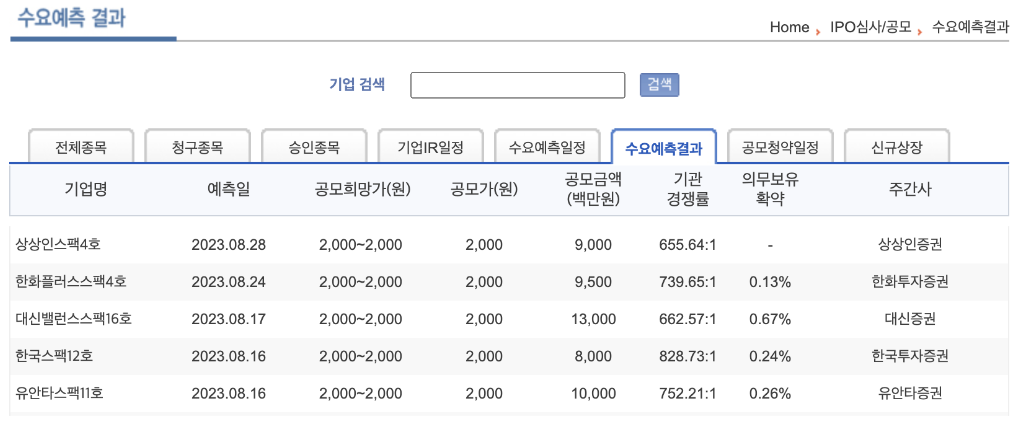

In [13]:
Image(filename = img_path +'38_수요예측결과.png')

## 신규상장 메뉴

- 기업명, 신규상장일, 현재가(원), 전일비(%), 공모가(원), 공모가대비등락률(%), 시초가(원), 시초/공모(%)

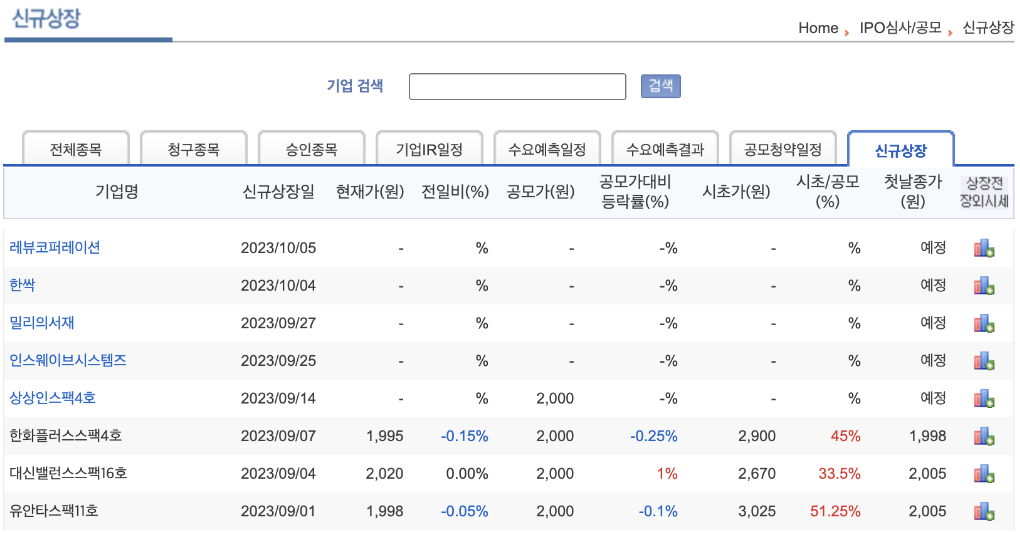

In [14]:
Image(filename = img_path +'38_신규상장.png')

## 공모청약일정
- 모델에는 이용하지 않습니다.
- 웹페이지 구성할 때 공모주 청약 일정이 필요합니다.
- 기업명, 공모주일정, 확정공모가, 희망공모가, 청약경쟁률, 주간사

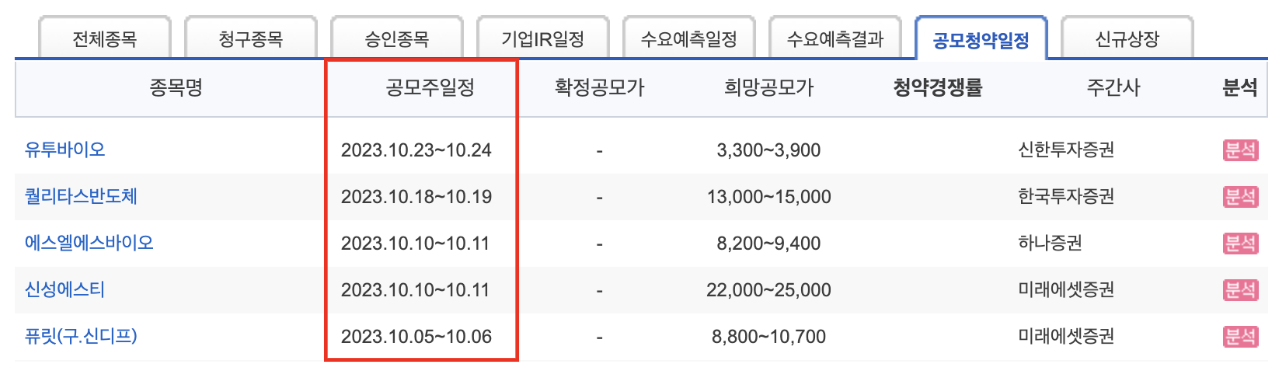

In [16]:
Image(filename = img_path +'38_공모청약일정.png')

### 셀레니움 4버전 이상 문법으로 작성되었습니다.
- 셀레니움 4버전 이상 업데이트 필요


In [17]:
#selenium 크롬 드라이버 설정 
#################################################################################################
# 1.번 방법
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#2. 번 방법, 1번 실패시 2번 사용 
# driver = webdriver.Chrome(ChromeDriverManager().install())
#################################################################################################

In [18]:
driver.implicitly_wait(5) 
# 39comunication 수요예측결과 페이지 
driver.get('http://www.38.co.kr/html/fund/index.htm?o=r1')

# 각 탭별 df 저장 방식
- df_all : 모든 데이터가 저장될 데이터프레임 
- df : 페이지별 데이터프레임
- 각 반복문 내에서 df와 df_all 을 concat하면 df_all에는 모든 페이지의 데이터프레임이 저장됨 

---
### 수요예측결과

In [ ]:
## 수요예측 결과 크롤링

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 결과를 저장할 빈 DataFrame 생성
df_all = pd.DataFrame()

# 페이지 번호를 1부터 63까지 반복 (2009년까지 상장 기업이 63페이지까지의 데이터)
for page in range(1, 64):
    # 페이지 URL 생성
    url = f"https://www.38.co.kr/html/fund/index.htm?o=r1&page={page}"

    # 웹페이지 요청
    response = requests.get(url)
    
    # 요청 성공 확인
    response.raise_for_status()

    # HTML 파싱
    soup = BeautifulSoup(response.text, 'html.parser')

    # table class의 summary속성이 수요예측결과인 테이블 가져옴
    table = soup.find('table', summary="수요예측결과")
    headers = [header.get_text().strip() for header in table.find_all('th')]
    rows = [[col.get_text().strip() for col in row.find_all('td')] for row in table.find_all('tr')]

    # DataFrame 생성 및 추가
    df = pd.DataFrame(rows[2:], columns=headers)  # 첫 번째 행은 헤더와 동일하므로 제거
    df_all = pd.concat([df_all, df])
    
    # 서버에 부담을 주지 않기 위해 잠시 대기
    time.sleep(1)

### 기업이름을 클릭하면 기업 개요에 대한 페이지로 이동함
### 해당 a 태그의 href 특성을 가져와 페이지로 이동한 뒤 종목코드 td에 접근

In [ ]:
##기업명에 해당하는 종목코드 추가     

list = []
for i in range(1,64):
    #페이지 이동
    driver.get("http://www.38.co.kr/html/fund/index.htm?o=r1&page=" + str(i))
    #서버에 부담을 주지 않기 위해 잠시 대기
    time.sleep(1)
    
    # 종목코드 가져오기
    table = driver.find_element(By.XPATH,'/html/body/table[3]/tbody/tr/td/table[1]/tbody/tr/td[1]/table[4]/tbody/tr[2]/td/table')
    tbody = table.find_element(By.TAG_NAME,'tbody')
    
    # 종목코드가 저장돼 있는 td까지 접근하여 종목코드 저장
    for tr in tbody.find_elements(By.TAG_NAME,'tr'):
        기업명 = tr.find_element(By.TAG_NAME,'td')
        링크 = 기업명.find_element(By.TAG_NAME,'a').get_attribute('href')
        driver.get(링크)
        종목코드 = driver.find_element(By.XPATH, "/html/body/table[3]/tbody/tr/td/table[1]/tbody/tr/td[1]/table[2]/tbody/tr[2]/td[4]")
        종목코드 = 종목코드.text.strip()
        list.append(종목코드)
        driver.back()

df_all['종목코드'] = list

# 결과 출력
df_all.reset_index(drop=True, inplace=True)
# df_all.to_csv(data_path + 'data_크롤링_38_수요예측결과.csv', index=False)
df_all

---
### 신규상장

In [ ]:
# 수요예측 결과 크롤링

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 결과를 저장할 빈 DataFrame 생성
df_all = pd.DataFrame()

# 페이지 번호를 1부터 64까지 반복 (2009년까지 상장 기업이 63페이지까지의 데이터)
for page in range(1, 65):
    # 페이지 URL 생성
    url = f"https://www.38.co.kr/html/fund/index.htm?o=nw&page={page}"

    # 웹페이지 요청
    response = requests.get(url)
    
    # 요청 성공 확인
    response.raise_for_status()

    # HTML 파싱
    soup = BeautifulSoup(response.text, 'html.parser')

    # 테이블 선택 및 파싱
    table = soup.find('table', summary="신규상장종목")
    headers = [header.get_text().strip() for header in table.find_all('th')]
    rows = [[col.get_text().strip() for col in row.find_all('td')] for row in table.find_all('tr')]

    # DataFrame 생성 및 추가
    df = pd.DataFrame(rows[2:], columns=headers)  # 첫 번째 행은 헤더와 동일하므로 제거
    df_all = pd.concat([df_all, df])

    # 서버에 부담을 주지 않기 위해 잠시 대기
    time.sleep(1)

# 결과 출력
df_all.reset_index(drop=True, inplace=True)
# df_all.to_csv(data_path + 'data_크롤링_38_신규상장.csv', index=False)
df_all

In [ ]:
df_all

---
### 공모청약일정

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# 결과를 저장할 빈 DataFrame 생성
df_all = pd.DataFrame()

# 페이지 번호를 1부터 64까지 반복 (2009년까지 상장 기업이 63페이지까지의 데이터)
for page in range(1, 65):
    # 페이지 URL 생성
    url = f"http://www.38.co.kr/html/fund/index.htm?o=k&page={page}"

    # 웹페이지 요청
    response = requests.get(url)
    
    # 요청 성공 확인
    response.raise_for_status()

    # HTML 파싱
    soup = BeautifulSoup(response.text, 'html.parser')

    # 테이블 선택 및 파싱, summary
    table = soup.find('table', summary="공모주 청약일정")
    headers = [header.get_text().strip() for header in table.find_all('th')]
    rows = [[col.get_text().strip() for col in row.find_all('td')] for row in table.find_all('tr')]

    # DataFrame 생성 및 추가
    df = pd.DataFrame(rows[2:], columns=headers)  # 첫 번째 행은 헤더와 동일하므로 제거
    df_all = pd.concat([df_all, df])

    # 서버에 부담을 주지 않기 위해 잠시 대기
    time.sleep(1)


driver.quit()

# 결과 출력
df_all.reset_index(drop=True, inplace=True)
#df_all.to_csv(data_path + 'data_크롤링_38_청약일정.csv', index=False)
df_all

,종목명,공모주일정,확정공모가,희망공모가,청약경쟁률,주간사,분석
0,유투바이오,2023.10.23~10.24,-,"3,300~3,900",,신한투자증권,
1,퀄리타스반도체,2023.10.18~10.19,-,"13,000~15,000",,한국투자증권,
2,에스엘에스바이오,2023.10.10~10.11,-,"8,200~9,400",,하나증권,
3,신성에스티,2023.10.10~10.11,-,"22,000~25,000",,미래에셋증권,
4,퓨릿(구.신디프),2023.10.05~10.06,-,"8,800~10,700",,미래에셋증권,
...,...,...,...,...,...,...,...
1539,텔코웨어(유가),2004.07.08~07.09,12,"12,000~15,500",45.72 : 1,삼성증권,
1540,아이레보,2003.12.15~12.16,6,"5,000~6,500",,교보증권,
1541,레인콤,2003.12.09~12.10,47,"37,000~47,000",,현대증권,
1542,비트윈,2003.12.09~12.10,4,"3,500~4,500",,미래에셋,


# IPO stock 크롤링

## 수요예측 탭
- 단순 기관경쟁률, 의무보유확약비율

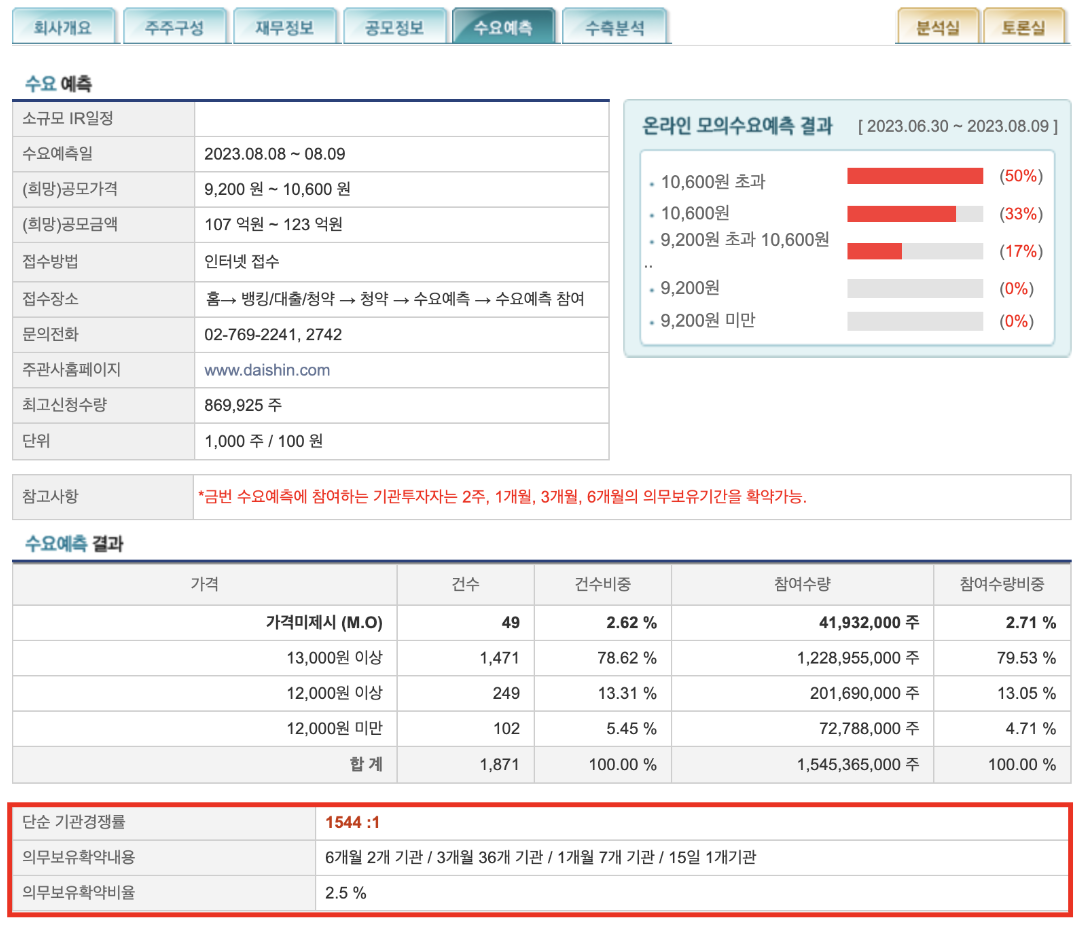

In [14]:
Image(filename = img_path +'IPO_기관경쟁률_의무보유확약비율.png')

## 주주구성 탭
- 보호예수 물량합계(합계, 비율), 유통가능 주식합계(합계, 비율)

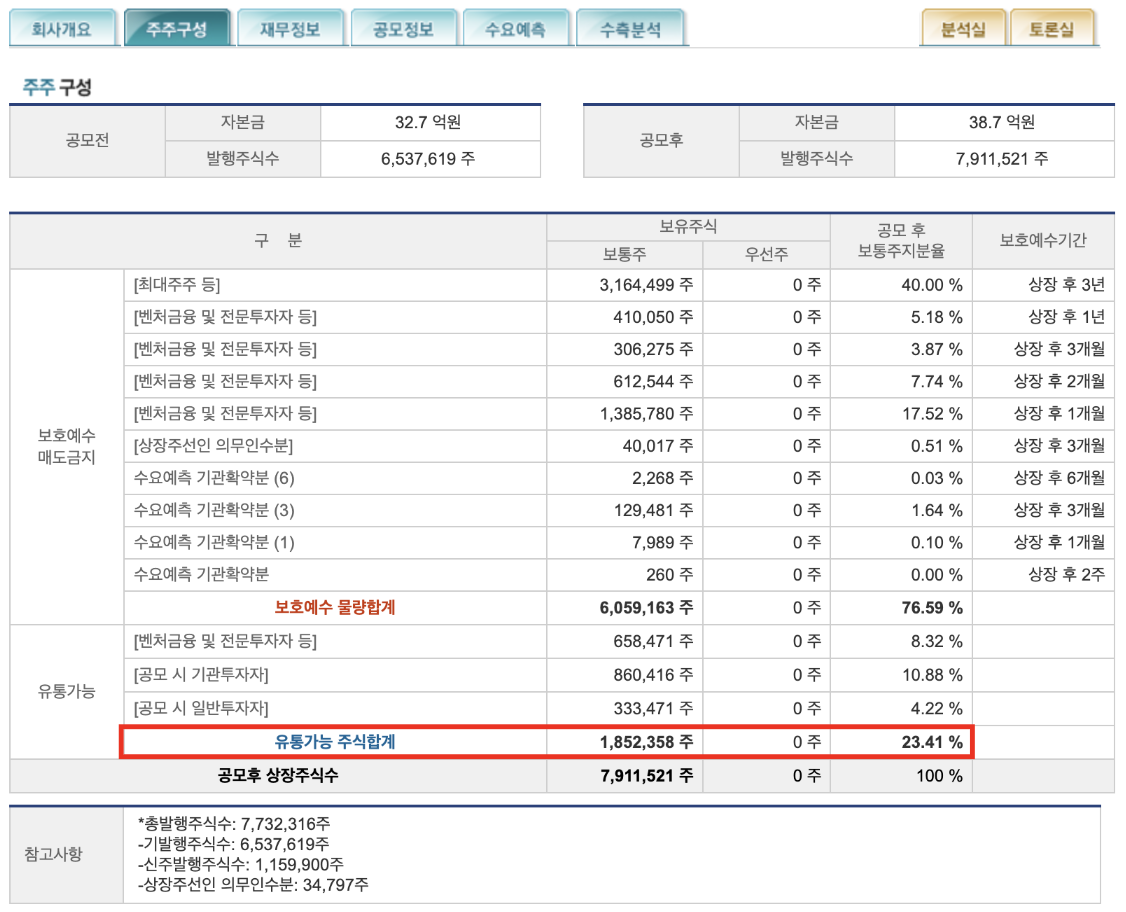

In [15]:
Image(filename = img_path +'IPO_유통가능주식비율.png')

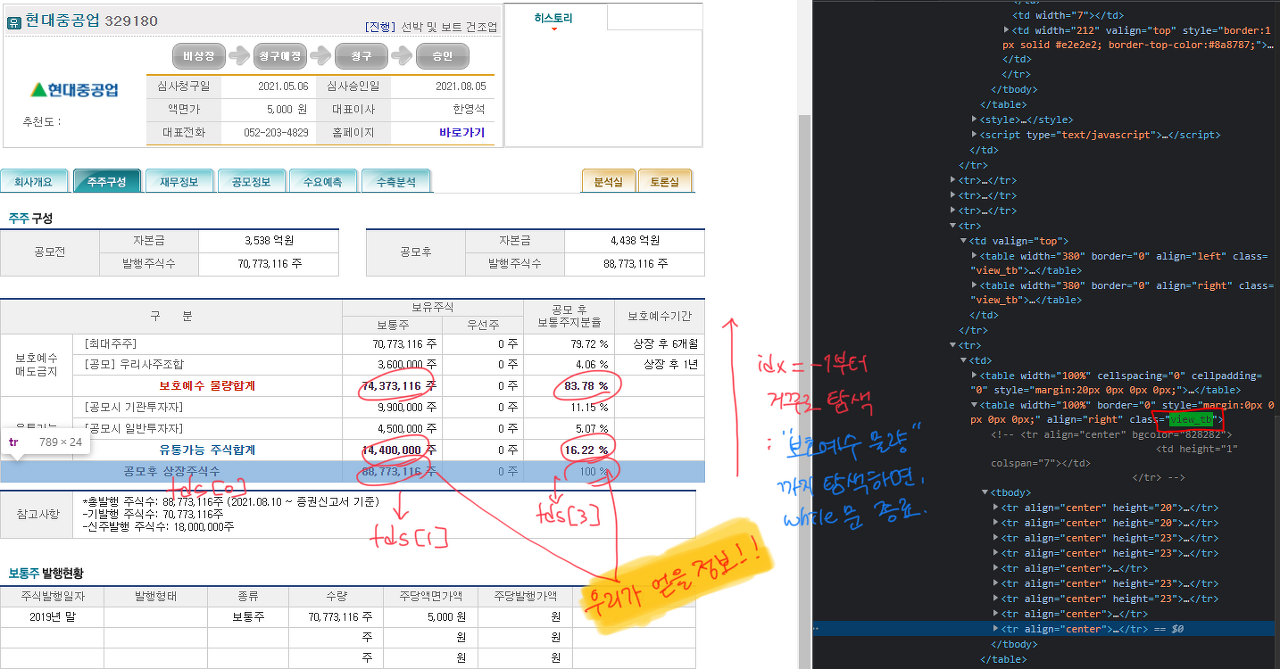

In [4]:
Image(filename = img_path +'IPO_주주구성탭구조.png')

## 재무정보 탭
- 유동자산, 비유동자산, 자산총계, 유동부채, 비유동부채, 부채총계, 자본금, 자본잉여금, 이익잉여금, 기타자본항목, 자본총계, 매출액, 영업이익, 당기순이익 
- 당기, 전기, 전전기로 나누어 크롤링 

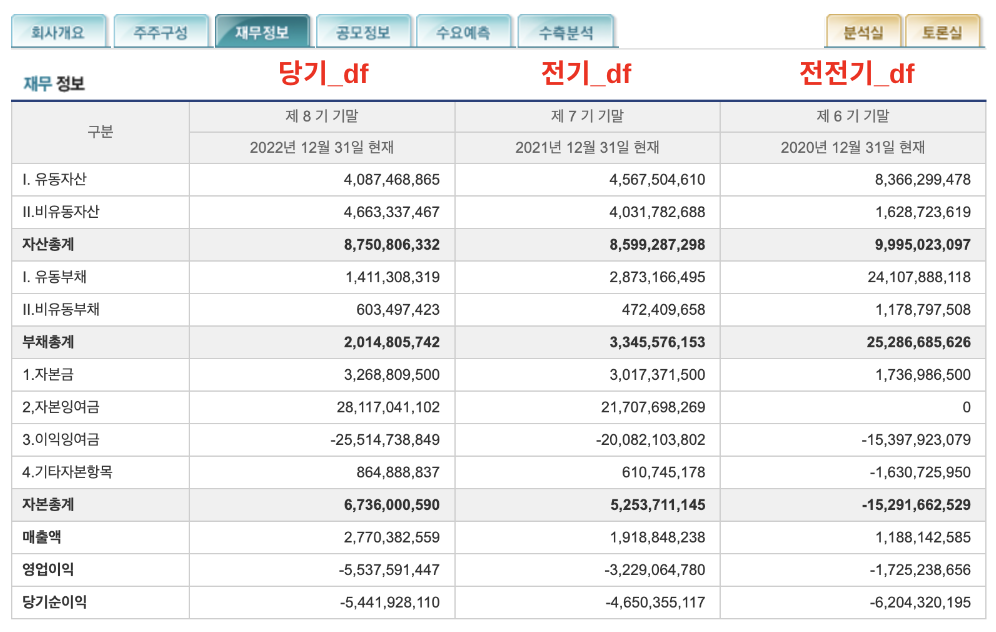

In [13]:
Image(filename = img_path +'IPO_재무정보.png')

In [21]:
# selenium 크롬 드라이버 설정 
# Permission Error 시 커널 초기화 후 실행  
#selenium 크롬 드라이버 설정 
#################################################################################################
# 1.번 방법
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

#2. 번 방법, 1번 실패시 2번 사용 
# driver = webdriver.Chrome(ChromeDriverManager().install())
#################################################################################################

driver.implicitly_wait(5) 

In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def get_shareholder_info_df(url, company_name, stock_code):
    response = requests.get(url)
    html = response.content.decode('utf-8', 'replace')
    soup = BeautifulSoup(html, 'lxml')
    
    try:
        table = soup.select('table[class="view_tb"]')[2] #유통 가능 정보 테이블
        table_rows = table.find_all('tr')

        shares_info = []

        
        # numbers_of_shares : 수량을 가져옴
        # ratio_of_shares : 비율을 가져옴
        # shares_info가 3이 되면, 즉 공모후 상장주식수, 유통가능주식합계, 보호예수물량합계를 다 가져오면 종료
        idx = -1
        while len(shares_info) < 3:
            tds = table_rows[idx].find_all('td')
            idx = idx - 1
            target_text = tds[0].text.strip().replace('\t', '').replace('\r\n', '')

            if target_text in ['공모후 상장주식수', '유통가능주식합계', '보호예수물량합계']:
                number_of_shares = int(tds[1].text.strip().replace('주', '').replace(',', ''))
                ratio_of_shares = tds[3].text.strip().replace(' ', '')
                shares_info.append([number_of_shares, ratio_of_shares])

        # If shareholder_info is not found, return an empty DataFrame
        if len(shares_info) < 3:
            return pd.DataFrame()    

        shareholder_info_df = pd.DataFrame({'종목명': company_name,
                                            '종목코드': stock_code,
                                            '공모후 상장주식수(주식수)': shares_info[0][0],
                                            '공모후 상장주식수(비율)': shares_info[0][1],
                                            '유통가능주식합계(주식수)': shares_info[1][0],
                                            '유통가능주식합계(비율)': shares_info[1][1],
                                            '보호예수물량합계(주식수)': shares_info[2][0],
                                            '보호예수물량합계(비율)': shares_info[2][1]}, index=[0])
        return shareholder_info_df
    
    except IndexError:
        return pd.DataFrame()

def get_demand_forcasting_df(XPATH, company_name, stock_code):
    #table XPATH를 받아 기관경쟁률, 의무보유확약이 저장된 행(tr)접근
    tbody = XPATH.find_element(By.TAG_NAME, 'tbody')
    trs = tbody.find_elements(By.TAG_NAME, 'tr')
    
    #기관경쟁률은 첫번째 행, 의무보유확약은 세번째 행에 존재
    기관경쟁률 = trs[0]
    의무보유 = trs[2]
    
    tds = 기관경쟁률.find_elements(By.TAG_NAME, 'td')
    td = tds[1]
    
    #td 안의 font 안의 strong 내에 값이 저장되어 있다.
    strong_element = td.find_element(By.TAG_NAME, 'font').find_element(By.TAG_NAME, 'strong')
    
    # 기관경쟁률이 1000을 넘는 경우 1,234 형식으로 저장되어 있는 경우가 있다.
    # 이런 경우 , 를 제거하고 float형으로 변환
    # strong_element가 존재하지 않거나, ''으로 저장된 경우에는 기관경쟁률 0 으로 저장.
    if strong_element:
        text_value = strong_element.text
        if ',' in text_value:
            compete_rate = float(text_value[:-2].strip().replace(',', ''))
        elif text_value == '':
            compete_rate = 0
        else:
            compete_rate = float(text_value[:-2].strip())
    else:
        compete_rate = 0
    
    
    tds = 의무보유.find_elements(By.TAG_NAME, 'td')
    td = tds[1]
    
    #td 구조내에 저장된 text를 가져온다.
    # - 라는 값이 저장되어 있거나, 비어있는 경우에는 의무보유확약 0으로 저장 
    # %가 뒤에 붙어있는 경우에는 %를 제거하고 float으로 저장
    if td.text.strip():
        text_value = td.text
        if '-' in text_value:
            commitment = 0
        elif text_value == '':
            commitment = 0
        else:
            commitment = float(td.text.strip().replace('%',''))
    else:
        commitment = 0

    forecasting_df = pd.DataFrame({'종목명': company_name,
                                   '종목코드': stock_code,
                                   '기관경쟁률': compete_rate,
                                   '의무보유확약': commitment}, index=[0])
    return forecasting_df

def get_financial_df(url, company_name, stock_code):
    response = requests.get(url)
    html = response.content.decode('utf-8', 'replace')
    soup = BeautifulSoup(html, 'lxml')
    table = soup.select('table[class="view_tb"]')[0] #재무정보 테이블
    table_rows = table.find_all('tr')
   
    당기 = []
    전기 = []
    전전기 = []
    
    #재무정보표 데이터 추가 
    #테이블의 첫번째 행부터(idx=0) 아래로 내려가며 행 단위로 데이터를 가져옴
    #첫번째 열은 당기, 두번째 열은 전기, 세번째 열은 전전기 데이터로 구분되어 있음
    idx = 0
    while idx < len(table_rows) and len(당기) < 16:
        tds = table_rows[idx].find_all('td')
        idx = idx + 1
        target_text = tds[0].text.strip().replace('\t','').replace('\r\n','')
        
        
        if any(text in target_text for text in ['구분', '유동자산', '비유동자산', '자산총계', '유동부채', '비유동부채', '부채총계', '자본금', '자본잉여금', '이익잉여금', '기타자본항목', '자본총계', '매출액','영업수익', '영업이익', '당기순이익']):
            
            if target_text == '구분':
                당기.append(tds[1].text.strip())
                전기.append(tds[2].text.strip())
                전전기.append(tds[3].text.strip())
            
            else:
                if '.' in tds[1].text.strip():
                    당기.append(float(tds[1].text.strip().replace(',', '')))
                else:
                    당기.append(int(tds[1].text.strip().replace(',', '')))

                if '.' in tds[2].text.strip():
                    전기.append(float(tds[2].text.strip().replace(',', '')))
                else:
                    전기.append(int(tds[2].text.strip().replace(',', '')))

                if '.' in tds[3].text.strip():
                    전전기.append(float(tds[3].text.strip().replace(',', '')))
                else:
                    전전기.append(int(tds[3].text.strip().replace(',', '')))
    
    # 구분 열이 제 n기, 2022년 ~ 과 같이 두가지로 구분되어 있다.
    # 따라서 위에서 저장하지 못한 구분 값을 추가로 append한다. 이 값은 당기[15], 전기[15], 전전기[15]에 위치한다
    try:
        당기.append(table_rows[1].find_all('td')[0].text.strip())
        전기.append(table_rows[1].find_all('td')[1].text.strip())
        전전기.append(table_rows[1].find_all('td')[2].text.strip())
    except IndexError:
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    #재무정보표 KRW 단위정보 추가 
    #기업별로 재무정보표를 작성한 가격단위가 다르기에 추가함. 이 값은 [16]에 위치한다.
    # ex) KRW(백만원), CNY, ...
    table = driver.find_element(By.XPATH, '//*[@id="print"]/table/tbody/tr[6]/td/table[1]')
    tbody = table.find_element(By.TAG_NAME, 'tbody')
    tr = tbody.find_elements(By.TAG_NAME, 'tr')[0]
    td = tr.find_elements(By.TAG_NAME, 'td')[1]
    font = td.find_element(By.TAG_NAME, 'font')
    
    if len(font.text) > 0:
        당기.append(font.text.strip())
        전기.append(font.text.strip())
        전전기.append(font.text.strip())
    else:
        당기.append('-')
        전기.append('-')
        전전기.append('-')
    

    try:
        당기_df = pd.DataFrame({'종목명': company_name,
                                       '종목코드': stock_code,
                                       '구분1': 당기[0],
                                       '구분2': 당기[15],
                                        '단위' : 당기[16],
                                       '유동자산': 당기[1],
                                        '비유동자산' : 당기[2],
                                         '자산총계' : 당기[3],
                                         '유동부채' : 당기[4],
                                         '비유동부채' : 당기[5],
                                         '부채총계' : 당기[6],
                                         '자본금' : 당기[7],
                                         '자본잉여금' : 당기[8],
                                         '이익잉여금' : 당기[9],
                                         '기타자본항목' : 당기[10],
                                         '자본총계' : 당기[11],
                                         '매출액' : 당기[12],
                                         '영업이익' : 당기[13],
                                         '당기순이익' : 당기[14]}, index=[0])

        전기_df = pd.DataFrame({'종목명': company_name,
                                       '종목코드': stock_code,
                                       '구분1': 전기[0],
                                        '구분2' : 전기[15],
                                        '단위' : 전기[16],
                                       '유동자산': 전기[1],
                                        '비유동자산' : 전기[2],
                                         '자산총계' : 전기[3],
                                         '유동부채' : 전기[4],
                                         '비유동부채' : 전기[5],
                                         '부채총계' : 전기[6],
                                         '자본금' : 전기[7],
                                         '자본잉여금' : 전기[8],
                                         '이익잉여금' : 전기[9],
                                         '기타자본항목' : 전기[10],
                                         '자본총계' : 전기[11],
                                         '매출액' : 전기[12],
                                         '영업이익' : 전기[13],
                                         '당기순이익' : 전기[14]}, index=[0])

        전전기_df = pd.DataFrame({'종목명': company_name,
                                       '종목코드': stock_code,
                                       '구분1': 전전기[0],
                                        '구분2' : 전전기[15],
                                        '단위' : 전전기[16],
                                       '유동자산': 전전기[1],
                                        '비유동자산' : 전전기[2],
                                         '자산총계' : 전전기[3],
                                         '유동부채' : 전전기[4],
                                         '비유동부채' : 전전기[5],
                                         '부채총계' : 전전기[6],
                                         '자본금' : 전전기[7],
                                         '자본잉여금' : 전전기[8],
                                         '이익잉여금' : 전전기[9],
                                         '기타자본항목' : 전전기[10],
                                         '자본총계' : 전전기[11],
                                         '매출액' : 전전기[12],
                                         '영업이익' : 전전기[13],
                                         '당기순이익' : 전전기[14]}, index=[0])       
    except IndexError:
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
            
        
    return 당기_df, 전기_df, 전전기_df

In [23]:
ipo_forcasting_df = pd.DataFrame()
ipo_stock_df = pd.DataFrame()
ipo_now_df = pd.DataFrame()
ipo_pre_df = pd.DataFrame()
ipo_prepre_df = pd.DataFrame()

#ipo_now, ipo_pre, ipo_prepre를 구성하기 위함 
now_info = pd.DataFrame()
pre_info = pd.DataFrame()
prepre_info = pd.DataFrame()


for year in range(2023, 2008, -1):
    # Loop through the months from 12 to 1
    start_month = 7 if year == 2023 else 12
    driver.quit()
    
######################################################################################    
    #1. 번
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    
    #2. 번 방법, 1번 실패시 2번 사용 
    # driver = webdriver.Chrome(ChromeDriverManager().install())
######################################################################################    
    
    for month in range(start_month,0, -1):
        # 연, 월로 페이지를 이동할 수 있는 구조
        # 최근 날짜 데이터 순으로 크롤링함
        driver.get(f"http://www.ipostock.co.kr/sub03/ipo08.asp?str1=&str4={year}&str5={month}")
        time.sleep(1)
        
        table = driver.find_element(By.XPATH,'//*[@id="print"]/table[1]/tbody/tr[4]/td/table/tbody/tr[2]/td/table')
        tbody = table.find_element(By.TAG_NAME,'tbody')


        #기업명 하나씩 클릭하면서 세부정보 확인
        for tr in tbody.find_elements(By.TAG_NAME, 'tr'):
            tds = tr.find_elements(By.TAG_NAME, 'td')
            # 세 번째 td 요소가 존재하지 않으면 다음 tr을 검사
            if len(tds) <= 2:  
                continue
            # 공모철회 인 종목의 정보는 필요 x     
            if tds[1].find_element(By.TAG_NAME, 'font').text.strip() == '공모철회':
                continue
                
            td = tds[2]  # 세 번째 td 요소에 접근
            td_table = td.find_element(By.TAG_NAME,'table')
            td_body = td_table.find_element(By.TAG_NAME,'tbody')
            td_td = td_body.find_element(By.TAG_NAME,'tr').find_elements(By.TAG_NAME, 'td')
            링크_element = td_td[1].find_element(By.TAG_NAME,'a')
            
            
            if 링크_element:
                링크 = 링크_element.get_attribute('href')
                driver.get(링크)
            
                ##수요예측 탭 
                #링크로 이동하면 수요예측 탭으로 이동한다
                #기업 이름, 종목코드
                name_td = driver.find_element(By.XPATH,'//*[@id="print"]/table/tbody/tr[3]/td/table/tbody/tr/td[1]/table/tbody/tr[1]/td/table/tbody/tr/td[1]')
                strong_elements = name_td.find_elements(By.TAG_NAME,'strong')

                # strong_elements가 존재하지 않으면 continue
                if len(strong_elements) < 2:
                    driver.back()
                    continue

                #strong_elements[0] : 기업명 / strong_elements[1] : 종목코드
                company_name = strong_elements[0].text
                stock_code = strong_elements[1].text

                # 기관경쟁률, 의무보유확약
                try:
                    forcasting_table = driver.find_element(By.XPATH, '//*[@id="print"]/table/tbody/tr[5]/td/table[5]') 
                    ipo_forcasting_df = pd.concat([ipo_forcasting_df, get_demand_forcasting_df(forcasting_table, company_name, stock_code)], axis=0)
                except NoSuchElementException:
                    driver.back()
                    continue

                ##재무정보 탭으로 이동 

                try:
                    재무정보_box = driver.find_element(By.XPATH,'//*[@id="print"]/table/tbody/tr[5]/td/table/tbody/tr[1]/td[3]/a')
                    link = 재무정보_box.get_attribute('href')
                    재무정보_box.click()

                    # 가끔 재무정보 탭 클릭시 어도비 설치 문구 등장. 무시하는 코드
                    try:
                        alert = driver.switch_to.alert
                        alert.dismiss()
                    except:
                        pass

                except NoSuchElementException:
                    driver.back()
                    continue
                
                #당기, 전기, 전전기 정보를 now_info, pre_info, prepre_info에 저장
                now_info, pre_info, prepre_info = get_financial_df(link, company_name, stock_code)
                ipo_now_df = pd.concat([ipo_now_df, now_info], axis=0)
                ipo_pre_df = pd.concat([ipo_pre_df, pre_info], axis=0)
                ipo_prepre_df = pd.concat([ipo_prepre_df, prepre_info], axis=0)
                
                ##주주구성 탭으로 이동
                try:
                    주주구성_box = driver.find_element(By.XPATH,'//*[@id="print"]/table/tbody/tr[5]/td/table[1]/tbody/tr[1]/td[2]/a')
                    link = 주주구성_box.get_attribute('href')
                    주주구성_box.click()
                except NoSuchElementException:
                    driver.back()
                    driver.back()
                    continue

                #주주구성 저장한 df
                ipo_stock_df = pd.concat([ipo_stock_df, get_shareholder_info_df(link, company_name, stock_code)], axis=0)

                driver.back()
                driver.back()
                driver.back()
            
            else:
                # a 요소가 없는 경우 다음 td를 검사
                continue

driver.quit()  

KeyboardInterrupt: 

# 최종적으로 얻은 데이터프레임

In [ ]:
# ipo_forcasting_df.to_csv(data_path+'data_크롤링_IPO_수요예측결과.csv')
# ipo_stock_df.to_csv(data_path+'data_크롤링_IPO_유통가능물량.csv')
# ipo_now_df.to_csv(data_path+'data_크롤링_IPO_당기재무정보.csv')
# ipo_pre_df.to_csv(data_path+'data_크롤링_IPO_전기재무정보.csv')
# ipo_prepre_df.to_csv(data_path+'data_크롤링_IPO_전전기재무정보.csv')

# streamlit 표시할 data 저장
### 이후 data_38, model_df를 이용한 결과와 score를 합쳐서 data_streamlit_df.csv 생성예정

In [24]:
# 모든 열을 출력한다.
pd.set_option('display.max_columns', None)

data_38_df = pd.read_csv(data_path + "data_크롤링_38_수요예측결과.csv")
data_38_ls = pd.read_csv(data_path + "data_크롤링_38_신규상장.csv")
data_38_sc = pd.read_csv(data_path + 'data_크롤링_38_청약일정.csv')
data_38_sc.rename(columns={'종목명' : '기업명'}, inplace=True)

data_38 = pd.merge(data_38_df.drop(['공모금액(백만원)','기관경쟁률','의무보유확약'],axis=1), data_38_ls[['기업명', '신규상장일', '시초/공모(%)']], on='기업명', how='left')
data_38 = pd.merge(data_38, data_38_sc[['기업명','공모주일정']], on='기업명', how='left')
data_38.head(5)

,기업명,예측일,공모희망가(원),공모가(원),주간사,종목코드,신규상장일,시초/공모(%),공모주일정
0,시큐레터,2023.08.08,"9,200~10,600","12,000",대신증권,418250,2023/08/24,%,2023.08.14~08.16
1,스마트레이더시스템,2023.08.07,"5,800~6,800","8,000",대신증권,424960,2023/08/22,%,2023.08.10~08.11
2,넥스틸,2023.08.02,"11,500~12,500","11,500",하나증권,92790,2023/08/21,%,2023.08.09~08.10
3,빅토리콘텐츠(구.빅텐츠),2023.07.28,"21,000~23,000","23,000",NH투자증권,210120,2023/08/17,%,2023.08.07~08.08
4,큐리옥스바이오시스템즈,2023.07.27,"13,000~16,000","13,000",키움증권,445680,2023/08/10,0%,2023.08.01~08.02


In [39]:
# data_38.to_csv(path+'data_streamlit_info.csv', index=False)

In [7]:
data_38.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1259
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기업명       1260 non-null   object
 1   예측일       1260 non-null   object
 2   공모희망가(원)  1260 non-null   object
 3   공모가(원)    1260 non-null   object
 4   주간사       1260 non-null   object
 5   종목코드      1260 non-null   int64 
 6   신규상장일     1260 non-null   object
 7   시초/공모(%)  1260 non-null   object
 8   공모주일정     1260 non-null   object
dtypes: int64(1), object(8)
memory usage: 98.4+ KB
